In [4]:
import sys
import time
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectFromModel,SelectKBest
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
import re
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib as mpl
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
#解决中文显示问题
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# 取消warning
warnings.filterwarnings("ignore")

train_data = pd.DataFrame(pd.read_csv("./train_data.csv"))
train_data.drop(["extra_return_next_month"],axis=1,inplace=True)
test_data = pd.DataFrame(pd.read_csv("./test_data.csv"))
test_data.drop(["extra_return_next_month"],axis=1,inplace=True)
X_columns = list(train_data.columns)
X_columns.remove("label")
X_columns.remove("code")
X_columns.remove("name")
X_columns.remove("time")
# 样本内训练集
train_data_X = train_data[X_columns]
train_data_Y = train_data[["label"]]
# 样本外测试集
test_data_X = test_data[X_columns]
test_data_Y = test_data[["label"]]

In [4]:
# 样本内训练集切分
X_train,X_test,Y_train,Y_test = train_test_split(train_data_X,train_data_Y,test_size=0.2,random_state=0)

In [5]:
# PCA主成分分析
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
test_data_X = pca.transform(test_data_X)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

400 0.9161398944885905


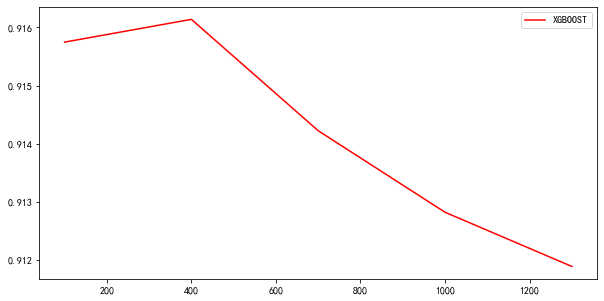

In [18]:
# XGBOOST模型调优
#n_estimators调参
axisx=range(100,1500,300)
scores=[]
for i in axisx:
    reg=XGBClassifier(n_estimators=i,subsample=0.8,learning_rate=0.1,colsample_bytree=0.6,max_depth=6,min_child_weight=1,max_delta_step=3,objective="binary:logistic",reg_alpha=1,reg_lambda=1,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="XGBOOST")
plt.legend()
plt.show()

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

0.05 0.917946731119215


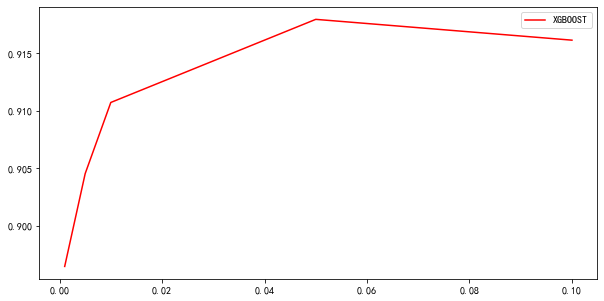

In [19]:
#learning_rate调参
axisx=[0.1,0.05,0.01,0.005,0.001]
scores=[]
for i in axisx:
    reg=XGBClassifier(n_estimators=400,subsample=0.8,learning_rate=i,colsample_bytree=0.6,max_depth=6,min_child_weight=1,max_delta_step=3,objective="binary:logistic",reg_alpha=1,reg_lambda=1,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="XGBOOST")
plt.legend()
plt.show()

0.6
0.7
0.8
0.9
0.8 0.9180165158688522


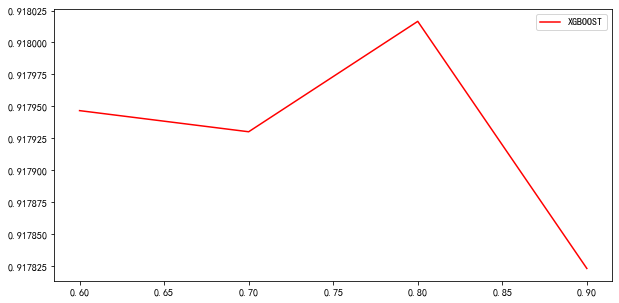

In [21]:
#colsample_bytree调参
axisx=[0.6,0.7,0.8,0.9]
scores=[]
for i in axisx:
    print(i)
    reg=XGBClassifier(n_estimators=400,subsample=0.8,learning_rate=0.05,colsample_bytree=i,max_depth=6,min_child_weight=1,max_delta_step=3,objective="binary:logistic",reg_alpha=1,reg_lambda=1,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="XGBOOST")
plt.legend()
plt.show()

3
4
5
6
7
8
9
10
6 0.9180165158688522


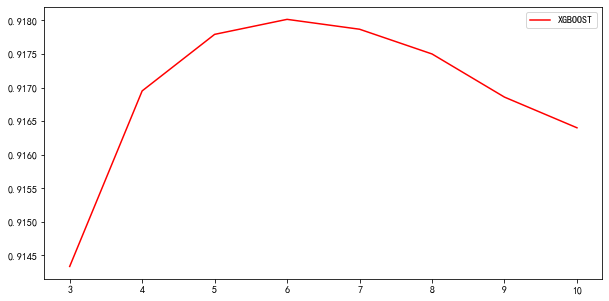

In [22]:
#max_depth调参
axisx=[i for i in range(3,11)]
scores=[]
for i in axisx:
    print(i)
    reg=XGBClassifier(n_estimators=400,subsample=0.8,learning_rate=0.05,colsample_bytree=0.8,max_depth=i,min_child_weight=1,max_delta_step=3,objective="binary:logistic",reg_alpha=1,reg_lambda=1,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="XGBOOST")
plt.legend()
plt.show()

1
2
3
4
5
6
7
8
9
4 0.9181905031768572


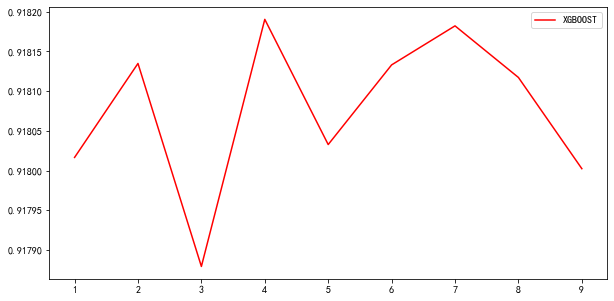

In [23]:
#min_child_weight调参
axisx=[i for i in range(1,10)]
scores=[]
for i in axisx:
    print(i)
    reg=XGBClassifier(n_estimators=400,subsample=0.8,learning_rate=0.05,colsample_bytree=0.8,max_depth=6,min_child_weight=i,max_delta_step=3,objective="binary:logistic",reg_alpha=1,reg_lambda=1,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="XGBOOST")
plt.legend()
plt.show()

1
2
3
4
5
6
7
8
9
2 0.9181975536496045


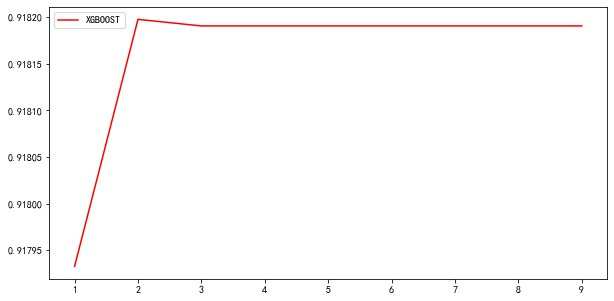

In [24]:
#max_delta_step调参
axisx=[i for i in range(1,10)]
scores=[]
for i in axisx:
    print(i)
    reg=XGBClassifier(n_estimators=400,subsample=0.8,learning_rate=0.05,colsample_bytree=0.8,max_depth=6,min_child_weight=4,max_delta_step=i,objective="binary:logistic",reg_alpha=1,reg_lambda=1,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="XGBOOST")
plt.legend()
plt.show()

1
2
3
4
5
6
7
8
9
4 0.9182878384701466


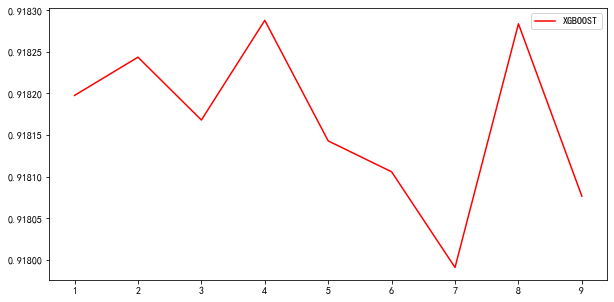

In [25]:
#reg_alpha调参
axisx=[i for i in range(1,10)]
scores=[]
for i in axisx:
    print(i)
    reg=XGBClassifier(n_estimators= 400,subsample=0.8,learning_rate=0.05,colsample_bytree=0.8,max_depth=6,min_child_weight=4,max_delta_step=2,objective="binary:logistic",reg_alpha=i,reg_lambda=1,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="XGBOOST")
plt.legend()
plt.show()

1
6
11
16
21
26
31
36
41
46
1 0.9182878384701466


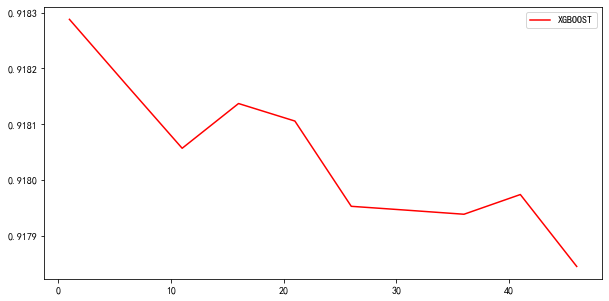

In [26]:
#reg_lambda调参
axisx=[i for i in range(1,50,5)]
scores=[]
for i in axisx:
    print(i)
    reg=XGBClassifier(n_estimators= 400,subsample=0.8,learning_rate=0.05,colsample_bytree=0.8,max_depth=6,min_child_weight=4,max_delta_step=2,objective="binary:logistic",reg_alpha=4,reg_lambda=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="XGBOOST")
plt.legend()
plt.show()

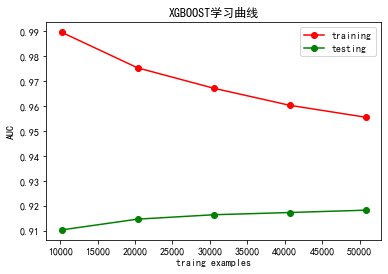

In [27]:
#学习曲线
xgb=XGBClassifier(n_estimators= 400,subsample=0.8,learning_rate=0.05,colsample_bytree=0.8,max_depth=6,min_child_weight=4,max_delta_step=2,objective="binary:logistic",reg_alpha=4,reg_lambda=1,randon_state=42)
train_sizes,train_score,test_score = learning_curve(xgb,X_train,Y_train.astype('int'),train_sizes=[0.2,0.4,0.6,0.8,1],cv=3,scoring='roc_auc',random_state=420)
train_score = np.mean(train_score,axis=1)
test_score = np.mean(test_score,axis=1)
plt.plot(train_sizes,train_score,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_score,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('AUC')
plt.title(u'XGBOOST学习曲线')
plt.show()

In [28]:
#样本内训练
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

xgb=XGBClassifier(n_estimators= 400,subsample=0.8,learning_rate=0.05,colsample_bytree=0.8,max_depth=6,min_child_weight=4,max_delta_step=2,objective="binary:logistic",reg_alpha=4,reg_lambda=1,randon_state=42)
eval_set=[(X_test,Y_test)]
xgb.fit(X_train,Y_train.astype('int'),early_stopping_rounds=40,eval_metric="auc",eval_set=eval_set,verbose=True)
Y_proba=xgb.predict_proba(X_test)[:,1]
Y_predict=xgb.predict(X_test)
auc=roc_auc_score(Y_test,Y_proba)
print("XGBOOST的AUC:",auc)
print(classification_report(Y_test, Y_predict, digits=4))

[0]	validation_0-auc:0.85743
Will train until validation_0-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.866763
[2]	validation_0-auc:0.870912
[3]	validation_0-auc:0.879694
[4]	validation_0-auc:0.881083
[5]	validation_0-auc:0.881991
[6]	validation_0-auc:0.882658
[7]	validation_0-auc:0.882957
[8]	validation_0-auc:0.883463
[9]	validation_0-auc:0.886071
[10]	validation_0-auc:0.887094
[11]	validation_0-auc:0.889135
[12]	validation_0-auc:0.890279
[13]	validation_0-auc:0.890474
[14]	validation_0-auc:0.89081
[15]	validation_0-auc:0.891186
[16]	validation_0-auc:0.891481
[17]	validation_0-auc:0.891599
[18]	validation_0-auc:0.89168
[19]	validation_0-auc:0.89198
[20]	validation_0-auc:0.892393
[21]	validation_0-auc:0.893046
[22]	validation_0-auc:0.893551
[23]	validation_0-auc:0.893679
[24]	validation_0-auc:0.894036
[25]	validation_0-auc:0.895265
[26]	validation_0-auc:0.896221
[27]	validation_0-auc:0.896623
[28]	validation_0-auc:0.896865
[29]	validation_0-auc:0.897056
[30]	validation_0-au

[259]	validation_0-auc:0.919565
[260]	validation_0-auc:0.919591
[261]	validation_0-auc:0.919609
[262]	validation_0-auc:0.919608
[263]	validation_0-auc:0.919614
[264]	validation_0-auc:0.919636
[265]	validation_0-auc:0.91965
[266]	validation_0-auc:0.919645
[267]	validation_0-auc:0.919652
[268]	validation_0-auc:0.919701
[269]	validation_0-auc:0.919749
[270]	validation_0-auc:0.919749
[271]	validation_0-auc:0.919752
[272]	validation_0-auc:0.919757
[273]	validation_0-auc:0.919764
[274]	validation_0-auc:0.919771
[275]	validation_0-auc:0.919783
[276]	validation_0-auc:0.919778
[277]	validation_0-auc:0.919798
[278]	validation_0-auc:0.919826
[279]	validation_0-auc:0.919827
[280]	validation_0-auc:0.919848
[281]	validation_0-auc:0.919858
[282]	validation_0-auc:0.919856
[283]	validation_0-auc:0.919875
[284]	validation_0-auc:0.919883
[285]	validation_0-auc:0.919891
[286]	validation_0-auc:0.91992
[287]	validation_0-auc:0.91993
[288]	validation_0-auc:0.919932
[289]	validation_0-auc:0.919928
[290]	valid

In [30]:
#样本量外测试
Y_proba=xgb.predict_proba(test_data_X)[:,1]
Y_predict=xgb.predict(test_data_X)
auc=roc_auc_score(test_data_Y,Y_proba)
print("XGBOOST的AUC:",auc)
print(classification_report(test_data_Y, Y_predict, digits=4))

XGBOOST的AUC: 0.9203433404914139
              precision    recall  f1-score   support

           0     0.8165    0.8829    0.8484     18419
           1     0.8728    0.8019    0.8358     18453

    accuracy                         0.8424     36872
   macro avg     0.8446    0.8424    0.8421     36872
weighted avg     0.8447    0.8424    0.8421     36872



In [2]:
#输出预测文件
test_data = pd.DataFrame(pd.read_csv("./test_data.csv"))
label_data = pd.DataFrame({"predict_label":Y_predict,"probability":Y_proba})
data = pd.concat([test_data,label_data],axis=1)
data.to_csv("./xgboost_predict_test_data.csv",encoding="utf-8-sig",index=False)

NameError: name 'pd' is not defined

100
200
300
400
500
600
700
800
900
1000
1100
1200
200 0.9168288449504706


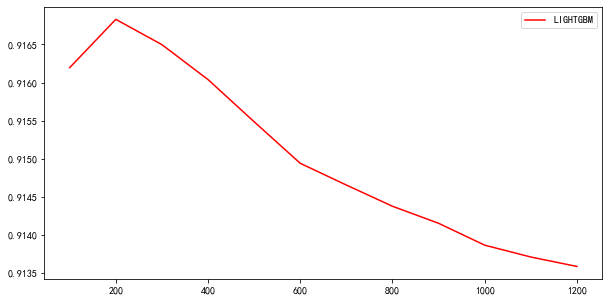

In [40]:
#LightGBM
#n_estimators调参
axisx=[i for i in range(100,1300,100)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

0.1
0.05
0.01
0.005
0.001
0.1 0.9168288449504706


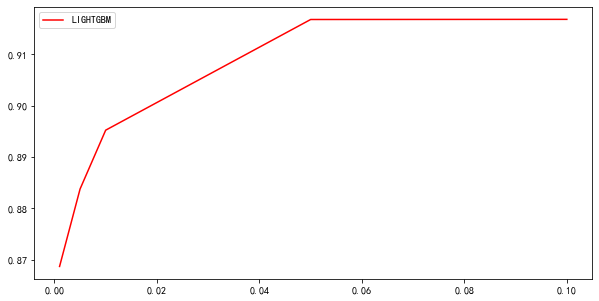

In [41]:
#learning_rate调参
axisx=[0.1,0.05,0.01,0.005,0.001]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

10
20
30
40
50
60
70
30 0.9165800760104296


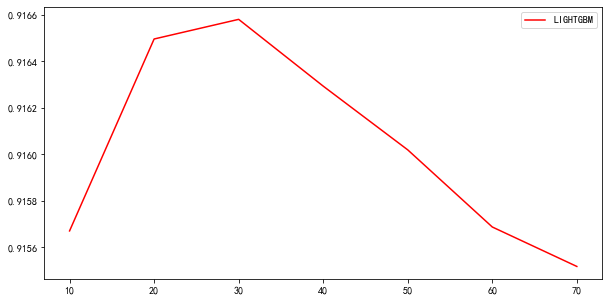

In [42]:
#num_leaves调参
axisx=[i for i in range(10,80,10)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

10
15
20
25
30
35
40
35 0.9169311232858792


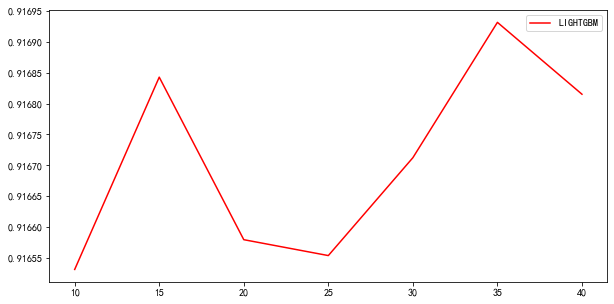

In [43]:
#min_data_in_leaf调参
axisx=[i for i in range(10,45,5)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

0.5
0.6
0.7
0.8
0.9
0.5 0.9171665306232694


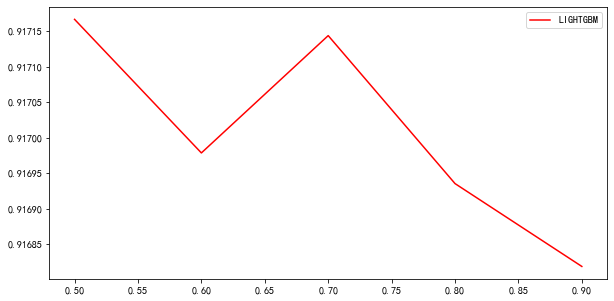

In [44]:
#feature_fraction调参
axisx=[i/10 for i in range(5,10)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=35,feature_fraction=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

0.5
0.6
0.7
0.8
0.9
0.5 0.9171665306232694


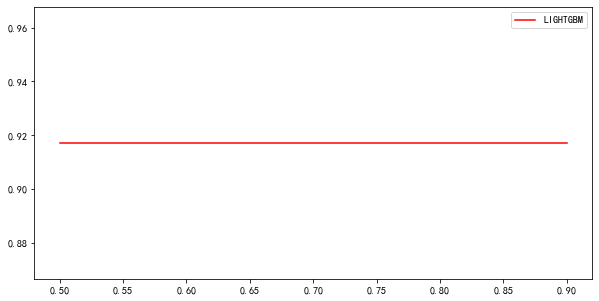

In [45]:
#bagging_fraction调参
axisx=[i/10 for i in range(5,10)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=35,feature_fraction=0.5,bagging_fraction=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

3
4
5
4 0.916299460696599


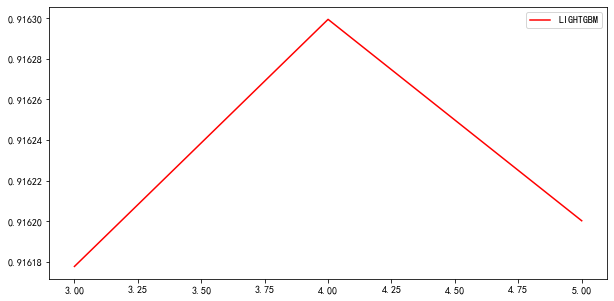

In [46]:
#bagging_freq调参
axisx=[i for i in range(3,6)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=35,feature_fraction=0.5,bagging_fraction=0.5,bagging_freq=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
1.9 0.9175301395331973


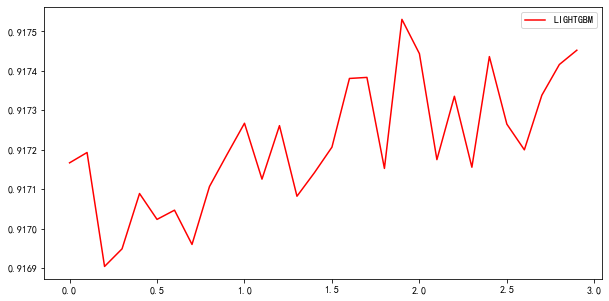

In [47]:
#lambda_l1调参
axisx=[i/10 for i in range(0,30)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=35,feature_fraction=0.5,bagging_fraction=0.5,lambda_l1=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
1.4 0.9176559658299666


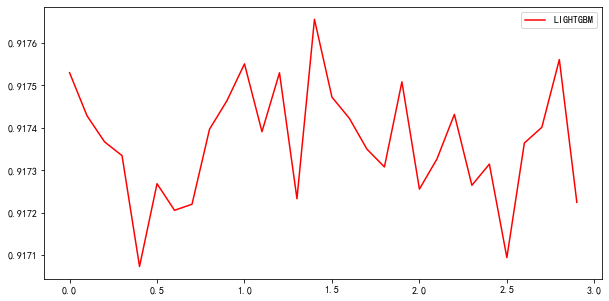

In [48]:
#lambda_l2调参
axisx=[i/10 for i in range(0,30)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=35,feature_fraction=0.5,bagging_fraction=0.5,lambda_l1=1.9,lambda_l2=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
170 0.9174621179276689


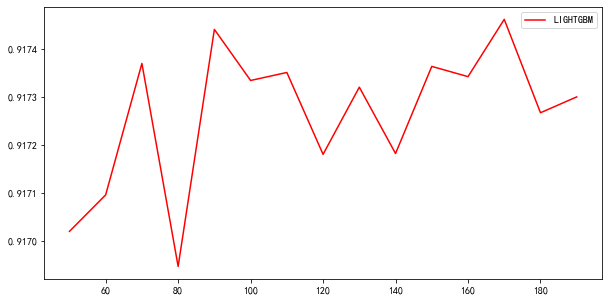

In [50]:
#max_bin调参
axisx=[i for i in range(50,200,10)]
scores=[]
for i in axisx:
    print(i)
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=35,feature_fraction=0.5,bagging_fraction=0.5,lambda_l1=1.8,lambda_l2=1.4,max_bin=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

1.0 0.9174894064159375


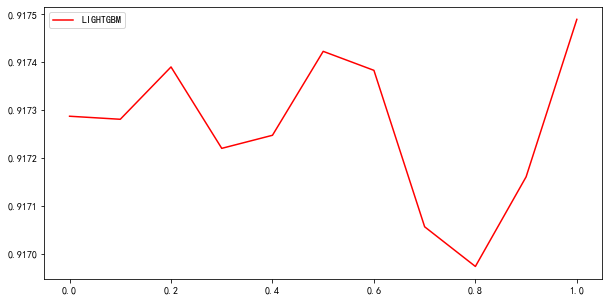

In [51]:
#min_split_gain调参
axisx=[i/10 for i in range(0,11)]
scores=[]
for i in axisx:
    reg=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=35,feature_fraction=0.5,lambda_l1=1.8,lambda_l2=1.4,min_split_gain=i,randon_state=42)
    cvresult=cross_val_score(reg,X_train,Y_train,cv=3,scoring="roc_auc")
    #记录得分
    scores.append(cvresult.mean())

print(axisx[scores.index(max(scores))],max(scores))
plt.figure(figsize=(10,5))
plt.plot(axisx,scores,c="red",label="LIGHTGBM")
plt.legend()
plt.show()

In [52]:
lgbm=LGBMClassifier(objective="binary",n_estimators= 200,learning_rate=0.1,num_leaves=30,min_data_in_leaf=35,feature_fraction=0.5,lambda_l1=1.8,lambda_l2=1.4,randon_state=42)
eval_set=[(X_test,Y_test)]
lgbm.fit(X_train,Y_train.astype('int'),early_stopping_rounds=40,eval_metric="auc",eval_set=eval_set,verbose=True)
Y_proba=lgbm.predict_proba(X_test)[:,1]
Y_predict=lgbm.predict(X_test)
auc=roc_auc_score(Y_test,Y_proba)
print("LIGHTGBM的AUC:",auc)
print(classification_report(Y_test, Y_predict, digits=4))

[1]	valid_0's auc: 0.682107	valid_0's binary_logloss: 0.682951
Training until validation scores don't improve for 40 rounds
[2]	valid_0's auc: 0.785328	valid_0's binary_logloss: 0.666257
[3]	valid_0's auc: 0.781718	valid_0's binary_logloss: 0.657922
[4]	valid_0's auc: 0.7993	valid_0's binary_logloss: 0.644591
[5]	valid_0's auc: 0.80441	valid_0's binary_logloss: 0.641903
[6]	valid_0's auc: 0.807646	valid_0's binary_logloss: 0.628658
[7]	valid_0's auc: 0.861915	valid_0's binary_logloss: 0.605564
[8]	valid_0's auc: 0.884366	valid_0's binary_logloss: 0.587687
[9]	valid_0's auc: 0.883563	valid_0's binary_logloss: 0.578985
[10]	valid_0's auc: 0.881045	valid_0's binary_logloss: 0.573752
[11]	valid_0's auc: 0.890178	valid_0's binary_logloss: 0.554237
[12]	valid_0's auc: 0.890444	valid_0's binary_logloss: 0.5528
[13]	valid_0's auc: 0.894214	valid_0's binary_logloss: 0.535097
[14]	valid_0's auc: 0.895989	valid_0's binary_logloss: 0.523349
[15]	valid_0's auc: 0.896992	valid_0's binary_logloss: 0.

[129]	valid_0's auc: 0.918576	valid_0's binary_logloss: 0.36194
[130]	valid_0's auc: 0.918561	valid_0's binary_logloss: 0.361904
[131]	valid_0's auc: 0.918592	valid_0's binary_logloss: 0.361815
[132]	valid_0's auc: 0.918644	valid_0's binary_logloss: 0.36163
[133]	valid_0's auc: 0.918678	valid_0's binary_logloss: 0.361538
[134]	valid_0's auc: 0.918706	valid_0's binary_logloss: 0.36147
[135]	valid_0's auc: 0.91879	valid_0's binary_logloss: 0.361284
[136]	valid_0's auc: 0.918806	valid_0's binary_logloss: 0.36123
[137]	valid_0's auc: 0.918806	valid_0's binary_logloss: 0.361155
[138]	valid_0's auc: 0.918831	valid_0's binary_logloss: 0.361071
[139]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.360991
[140]	valid_0's auc: 0.918886	valid_0's binary_logloss: 0.360825
[141]	valid_0's auc: 0.918916	valid_0's binary_logloss: 0.360733
[142]	valid_0's auc: 0.918974	valid_0's binary_logloss: 0.360599
[143]	valid_0's auc: 0.919003	valid_0's binary_logloss: 0.360468
[144]	valid_0's auc: 0.91901	v

In [53]:
#样本量外测试
Y_proba=lgbm.predict_proba(test_data_X)[:,1]
Y_predict=lgbm.predict(test_data_X)
auc=roc_auc_score(test_data_Y,Y_proba)
print("LIGHTGBM的AUC:",auc)
print(classification_report(test_data_Y, Y_predict, digits=4))

LIGHTGBM的AUC: 0.9197782654101823
              precision    recall  f1-score   support

           0     0.8160    0.8818    0.8476     18419
           1     0.8717    0.8015    0.8352     18453

    accuracy                         0.8416     36872
   macro avg     0.8439    0.8417    0.8414     36872
weighted avg     0.8439    0.8416    0.8414     36872



In [54]:
#输出预测文件
test_data = pd.DataFrame(pd.read_csv("./test_data.csv"))
label_data = pd.DataFrame({"predict_label":Y_predict,"probability":Y_proba})
data = pd.concat([test_data,label_data],axis=1)
data.to_csv("./lightgbm_predict_test_data.csv",encoding="utf-8-sig",index=False)

In [57]:
# 按月统计评估指标
xgb_data = pd.DataFrame(pd.read_csv("./xgboost_predict_test_data.csv"))
lgb_data = pd.DataFrame(pd.read_csv("./lightgbm_predict_test_data.csv"))

xgb_group = xgb_data.groupby("time")
time = []
accuracy = []
auc = []
for name, group in xgb_group:
    time.append(name)
    accuracy.append(accuracy_score(group["label"],group["predict_label"]))
    auc.append(roc_auc_score(group["label"],group["probability"]))
xgb_result = pd.DataFrame({"time":time,"Accuracy":accuracy,"AUC":auc})
print(xgb_result)
xgb_result.to_csv("./xgboost_evaluation.csv",encoding="utf-8-sig")

lgb_group = lgb_data.groupby("time")
time = []
accuracy = []
auc = []
for name, group in lgb_group:
    time.append(name)
    accuracy.append(accuracy_score(group["label"],group["predict_label"]))
    auc.append(roc_auc_score(group["label"],group["probability"]))
lgb_result = pd.DataFrame({"time":time,"Accuracy":accuracy,"AUC":auc})
print(lgb_result)
lgb_result.to_csv("./lightgbm_evaluation.csv",encoding="utf-8-sig")

      time  Accuracy       AUC
0   202101  0.850061  0.924308
1   202102  0.814652  0.897409
2   202103  0.851528  0.925261
3   202104  0.855403  0.937607
4   202105  0.889406  0.957498
5   202106  0.844111  0.919805
6   202107  0.834601  0.911682
7   202108  0.815997  0.901932
8   202109  0.813572  0.893531
9   202110  0.874536  0.949943
10  202111  0.816190  0.890590
11  202112  0.835209  0.918154
12  202202  0.858484  0.936423
13  202203  0.840689  0.916810
      time  Accuracy       AUC
0   202101  0.847623  0.922627
1   202102  0.813851  0.898132
2   202103  0.851528  0.924771
3   202104  0.856582  0.936681
4   202105  0.886302  0.956280
5   202106  0.843341  0.919409
6   202107  0.828897  0.910781
7   202108  0.817875  0.899265
8   202109  0.813572  0.894000
9   202110  0.870824  0.949292
10  202111  0.817304  0.891441
11  202112  0.837387  0.918191
12  202202  0.857401  0.936103
13  202203  0.841407  0.916055
